# Pitching Advanced Modeling

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import math
from scipy.stats import kurtosis, skew

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MaxAbsScaler, MinMaxScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline

# this will allow us to visualize the pipeline (may not be available in learn-env)
from sklearn import set_config
set_config(display= 'diagram')

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, \
RandomizedSearchCV, StratifiedKFold, KFold
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, \
AdaBoostClassifier, GradientBoostingClassifier

from pickle import dump, load

# ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)

np.random_state = 42

In [2]:
# load 
pitching_adv = pd.read_csv('Data/pitching_adv', index_col = 0)
pitching_adv = pitching_adv.drop(columns = ['Season', 'Name', 'Team', 'Dollars'])
pitching_adv

,Age,Salary,Adjusted 2021 Salary,W,L,WAR,ERA,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,RS,IFH,BU,BUH,K/9,BB/9,K/BB,H/9,HR/9,AVG,WHIP,BABIP,LOB%,FIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,Starting,Start-IP,Relieving,Relief-IP,RAR,tERA,xFIP,WPA,-WPA,+WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,FB% 2,FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,HLD,SD,MD,ERA-,FIP-,xFIP-,K%,BB%,SIERA,RS/9,E-F,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,Age Rng,K-BB%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,kwERA,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,K/9+,BB/9+,K/BB+,H/9+,HR/9+,AVG+,WHIP+,BABIP+,LOB%+,K%+,BB%+,LD%+,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xERA
0,33.0,500000.0,558474.0,1.0,1.0,-0.4,4.70,33.0,0.0,0.0,0.0,0.0,3.0,30.2,129.0,25.0,17.0,16.0,6.0,14.0,3.0,1.0,1.0,0.0,35.0,23.0,39.0,16.0,1.0,172.0,320.0,492.0,9.0,1.0,0.0,0.0,10.27,4.11,2.50,7.34,1.76,0.219,1.27,0.260,0.728,4.86,0.59,0.205,0.295,0.500,0.026,0.154,0.043,0.0,0.0,0.0,-3.4,30.2,-3.4,5.10,4.20,-0.48,-2.23,1.75,-1.97,-0.23,0.84,0.68,1.15,1.00,24.0,0.04,-0.61,0.678,91.5,0.259,81.0,0.000,0.0,0.000,0.0,0.000,0.0,0.063,83.7,0.0,0.0,0.026,0.0,-3.2,4.9,0.0,0.0,0.0,-1.0,0.0,-1.00,3.95,0.00,0.00,0.00,-3.45,0.0,0.293,0.747,0.514,0.500,0.787,0.703,0.486,0.636,0.148,6.0,4.0,6.0,121.0,129.0,108.0,0.271,0.109,3.50,2.64,-0.17,0.678,0.000,0.000,0.061,0.0,0.000,0.261,0.000,0.000,0.0,0.000,0.0,0.0,0.0,91.4,0.0,0.0,83.7,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.7,0.0,0.0,-5.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.1,0.0,0.0,4.3,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,-2.5,0.0,0.0,-1.4,0.0,0.0,5.2,0.0,0.0,0.0,0.0,0.0,0.0,-0.77,0.00,0.00,-4.7,0.0,0.00,4.15,0.00,0.00,0.0,0.00,0.0,0.0,0.260,0.738,0.516,0.431,0.788,0.704,0.534,23.6,-0.2,0.2,-0.1,0.1,33 - 33,0.163,0.295,0.359,0.346,0.103,0.526,0.372,3.54,0.426,0.000,0.0,0.000,0.678,0.000,0.058,0.0,0.0,0.000,0.263,0.000,0.0,0.0,0.0,92.2,0.0,84.5,0.0,0.0,0.0,81.6,0.0,0.0,0.0,0.0,-4.0,0.0,-5.5,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,9.5,0.0,3.8,0.0,0.0,0.0,-0.6,0.0,0.0,0.0,0.0,-2.5,0.0,-1.2,0.0,0.0,0.0,5.0,0.0,0.00,0.0,0.00,-0.77,0.00,-4.33,0.0,0.0,0.00,4.00,0.00,0.270,0.728,0.516,0.467,0.781,0.704,0.537,23.6,-0.2,130.0,139.0,93.0,84.0,1

### Grouping by Name and Averages

In [3]:
pitching_adv_grouped = pd.read_csv('Data/pitching_adv', index_col = 0)

In [4]:
pitching_adv_grouped.head()

,Season,Name,Team,Age,Salary,Adjusted 2021 Salary,W,L,WAR,ERA,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,RS,IFH,BU,BUH,K/9,BB/9,K/BB,H/9,HR/9,AVG,WHIP,BABIP,LOB%,FIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,Starting,Start-IP,Relieving,Relief-IP,RAR,Dollars,tERA,xFIP,WPA,-WPA,+WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,FB% 2,FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,HLD,SD,MD,ERA-,FIP-,xFIP-,K%,BB%,SIERA,RS/9,E-F,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,Age Rng,K-BB%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,kwERA,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,K/9+,BB/9+,K/BB+,H/9+,HR/9+,AVG+,WHIP+,BABIP+,LOB%+,K%+,BB%+,LD%+,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xERA
0,2015.0,David Aardsma,ATL,33.0,500000.0,558474.0,1.0,1.0,-0.4,4.70,33.0,0.0,0.0,0.0,0.0,3.0,30.2,129.0,25.0,17.0,16.0,6.0,14.0,3.0,1.0,1.0,0.0,35.0,23.0,39.0,16.0,1.0,172.0,320.0,492.0,9.0,1.0,0.0,0.0,10.27,4.11,2.50,7.34,1.76,0.219,1.27,0.260,0.728,4.86,0.59,0.205,0.295,0.500,0.026,0.154,0.043,0.0,0.0,0.0,-3.4,30.2,-3.4,($2.9),5.10,4.20,-0.48,-2.23,1.75,-1.97,-0.23,0.84,0.68,1.15,1.00,24.0,0.04,-0.61,0.678,91.5,0.259,81.0,0.000,0.0,0.000,0.0,0.000,0.0,0.063,83.7,0.0,0.0,0.026,0.0,-3.2,4.9,0.0,0.0,0.0,-1.0,0.0,-1.00,3.95,0.00,0.00,0.00,-3.45,0.0,0.293,0.747,0.514,0.500,0.787,0.703,0.486,0.636,0.148,6.0,4.0,6.0,121.0,129.0,108.0,0.271,0.109,3.50,2.64,-0.17,0.678,0.000,0.000,0.061,0.0,0.0,0.261,0.0,0.000,0.0,0.000,0.0,0.0,0.0,91.4,0.0,0.0,83.7,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.7,0.0,0.0,-5.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.1,0.0,0.0,4.3,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,-2.5,0.0,0.0,-1.4,0.0,0.0,5.2,0.0,0.0,0.0,0.0,0.0,0.0,-0.77,0.00,0.00,-4.7,0.0,0.0,4.15,0.0,0.00,0.0,0.00,0.0,0.0,0.260,0.738,0.516,0.431,0.788,0.704,0.534,23.6,-0.2,0.2,-0.1,0.1,33 - 33,0.163,0.295,0.359,0.346,0.103,0.526,0.372,3.54,0.426,0.000,0.0,0.000,0.678,0.000,0.058,0.0,0.0,0.000,0.263,0.000,0.0,0.0,0.0,92.2,0.0,84.5,0.0,0.0,0.0,81.6,0.0,0.0,0.0,0.0,-4.0,0.0,-5.5,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,9.5,0.0,3.8,0.0,0.0,0.0,-0.6,0.0,0.0,0.0,0.0,-2.5,0.0,-1.2,0.0,0.0,0.0,5.0,0.0,0.00,0.0,0.00,-0.77,0.00,-4.33,0.0,0.0,0.00,4.00,0.0,0.270,0.728,0.516,0.467,0

### Adding Salary Difference

A good indicator of a player's salary could be accounting for the player's difference in salary each year. This could address the large salary difference for players who make a significant amount more in their free agency year. 

In [5]:
pitching_adv_grouped['Salary Difference'] = pitching_adv_grouped['Adjusted 2021 Salary'].diff()
pitching_adv_grouped = pitching_adv_grouped.fillna(0)
pitching_adv_grouped

,Season,Name,Team,Age,Salary,Adjusted 2021 Salary,W,L,WAR,ERA,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,RS,IFH,BU,BUH,K/9,BB/9,K/BB,H/9,HR/9,AVG,WHIP,BABIP,LOB%,FIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,Starting,Start-IP,Relieving,Relief-IP,RAR,Dollars,tERA,xFIP,WPA,-WPA,+WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,FB% 2,FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,HLD,SD,MD,ERA-,FIP-,xFIP-,K%,BB%,SIERA,RS/9,E-F,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,Age Rng,K-BB%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,kwERA,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,K/9+,BB/9+,K/BB+,H/9+,HR/9+,AVG+,WHIP+,BABIP+,LOB%+,K%+,BB%+,LD%+,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xERA,Salary Difference
0,2015.0,David Aardsma,ATL,33.0,500000.0,558474.0,1.0,1.0,-0.4,4.70,33.0,0.0,0.0,0.0,0.0,3.0,30.2,129.0,25.0,17.0,16.0,6.0,14.0,3.0,1.0,1.0,0.0,35.0,23.0,39.0,16.0,1.0,172.0,320.0,492.0,9.0,1.0,0.0,0.0,10.27,4.11,2.50,7.34,1.76,0.219,1.27,0.260,0.728,4.86,0.59,0.205,0.295,0.500,0.026,0.154,0.043,0.0,0.0,0.0,-3.4,30.2,-3.4,($2.9),5.10,4.20,-0.48,-2.23,1.75,-1.97,-0.23,0.84,0.68,1.15,1.00,24.0,0.04,-0.61,0.678,91.5,0.259,81.0,0.000,0.0,0.000,0.0,0.000,0.0,0.063,83.7,0.0,0.0,0.026,0.0,-3.2,4.9,0.0,0.0,0.0,-1.0,0.0,-1.00,3.95,0.00,0.00,0.00,-3.45,0.0,0.293,0.747,0.514,0.500,0.787,0.703,0.486,0.636,0.148,6.0,4.0,6.0,121.0,129.0,108.0,0.271,0.109,3.50,2.64,-0.17,0.678,0.000,0.000,0.061,0.0,0.000,0.261,0.000,0.000,0.0,0.000,0.0,0.0,0.0,91.4,0.0,0.0,83.7,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.7,0.0,0.0,-5.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.1,0.0,0.0,4.3,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,-2.5,0.0,0.0,-1.4,0.0,0.0,5.2,0.0,0.0,0.0,0.0,0.0,0.0,-0.77,0.00,0.00,-4.7,0.0,0.00,4.15,0.00,0.00,0.0,0.00,0.0,0.0,0.260,0.738,0.516,0.431,0.788,0.704,0.534,23.6,-0.2,0.2,-0.1,0.1,33 - 33,0.163,0.295,0.359,0.346,0.103,0.526,0.372,3.54,0.426,0.000,0.0,0.000,0.678,0.000,0.058,0.0,0.0,0.000,0.263,0.000,0.0,0.0,0.0,92.2,0.0,84.5,0.0,0.0,0.0,81.6,0.0,0.0,0.0,0.0,-4.0,0.0,-5.5,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,9.5,0.0,3.8,0.0,0.0,0.0,-0.6,0.0,0.0,0.0,0.0,-2.5,0.0,-1.2,0.0,0.0,0.0,5.0,0.0,0.00,0.0,0.00,-0.77,0.00,-4.33,0.0,0.0,0.00,4.00,0.00,

In [6]:
# group by Name and find averages across all other features
pitching_adv_grouped = pitching_adv_grouped.groupby(['Name']).mean()
pitching_adv_grouped = pitching_adv_grouped.drop(columns = 'Season')
pitching_adv_grouped.head()

,Age,Salary,Adjusted 2021 Salary,W,L,WAR,ERA,G,GS,CG,ShO,SV,BS,IP,TBF,H,R,ER,HR,BB,IBB,HBP,WP,BK,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,RS,IFH,BU,BUH,K/9,BB/9,K/BB,H/9,HR/9,AVG,WHIP,BABIP,LOB%,FIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,Starting,Start-IP,Relieving,Relief-IP,RAR,tERA,xFIP,WPA,-WPA,+WPA,RE24,REW,pLI,inLI,gmLI,exLI,Pulls,WPA/LI,Clutch,FB% 2,FBv,SL%,SLv,CT%,CTv,CB%,CBv,CH%,CHv,SF%,SFv,KN%,KNv,XX%,PO%,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,HLD,SD,MD,ERA-,FIP-,xFIP-,K%,BB%,SIERA,RS/9,E-F,FA% (sc),FT% (sc),FC% (sc),FS% (sc),FO% (sc),SI% (sc),SL% (sc),CU% (sc),KC% (sc),EP% (sc),CH% (sc),SC% (sc),KN% (sc),UN% (sc),vFA (sc),vFT (sc),vFC (sc),vFS (sc),vFO (sc),vSI (sc),vSL (sc),vCU (sc),vKC (sc),vEP (sc),vCH (sc),vSC (sc),vKN (sc),FA-X (sc),FT-X (sc),FC-X (sc),FS-X (sc),FO-X (sc),SI-X (sc),SL-X (sc),CU-X (sc),KC-X (sc),EP-X (sc),CH-X (sc),SC-X (sc),KN-X (sc),FA-Z (sc),FT-Z (sc),FC-Z (sc),FS-Z (sc),FO-Z (sc),SI-Z (sc),SL-Z (sc),CU-Z (sc),KC-Z (sc),EP-Z (sc),CH-Z (sc),SC-Z (sc),KN-Z (sc),wFA (sc),wFT (sc),wFC (sc),wFS (sc),wFO (sc),wSI (sc),wSL (sc),wCU (sc),wKC (sc),wEP (sc),wCH (sc),wSC (sc),wKN (sc),wFA/C (sc),wFT/C (sc),wFC/C (sc),wFS/C (sc),wFO/C (sc),wSI/C (sc),wSL/C (sc),wCU/C (sc),wKC/C (sc),wEP/C (sc),wCH/C (sc),wSC/C (sc),wKN/C (sc),O-Swing% (sc),Z-Swing% (sc),Swing% (sc),O-Contact% (sc),Z-Contact% (sc),Contact% (sc),Zone% (sc),Pace,RA9-WAR,BIP-Wins,LOB-Wins,FDP-Wins,K-BB%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,kwERA,TTO%,CH% (pi),CS% (pi),CU% (pi),FA% (pi),FC% (pi),FS% (pi),KN% (pi),SB% (pi),SI% (pi),SL% (pi),XX% (pi),vCH (pi),vCS (pi),vCU (pi),vFA (pi),vFC (pi),vFS (pi),vKN (pi),vSB (pi),vSI (pi),vSL (pi),vXX (pi),CH-X (pi),CS-X (pi),CU-X (pi),FA-X (pi),FC-X (pi),FS-X (pi),KN-X (pi),SB-X (pi),SI-X (pi),SL-X (pi),XX-X (pi),CH-Z (pi),CS-Z (pi),CU-Z (pi),FA-Z (pi),FC-Z (pi),FS-Z (pi),KN-Z (pi),SB-Z (pi),SI-Z (pi),SL-Z (pi),XX-Z (pi),wCH (pi),wCS (pi),wCU (pi),wFA (pi),wFC (pi),wFS (pi),wKN (pi),wSB (pi),wSI (pi),wSL (pi),wXX (pi),wCH/C (pi),wCS/C (pi),wCU/C (pi),wFA/C (pi),wFC/C (pi),wFS/C (pi),wKN/C (pi),wSB/C (pi),wSI/C (pi),wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi),FRM,K/9+,BB/9+,K/BB+,H/9+,HR/9+,AVG+,WHIP+,BABIP+,LOB%+,K%+,BB%+,LD%+,GB%+,FB%+,HR/FB%+,Pull%+,Cent%+,Oppo%+,Soft%+,Med%+,Hard%+,EV,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xERA,Salary Difference
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A.J. Achter,27.0,392500.0,433043.0,1.0,0.0,-0.40,3.110,27.0,0.0,0.0,0.0,0.0,0.0,37.20,160.0,43.0,13.0,13.0,7.0,12.0,1.0,1.0,0.0,0.0,14.0,60.0,46.0,27.0,4.0,211.0,357.0,568.0,13.0,2.0,0.0,0.0,3.350,2.870,1.170,10.270,1.670,0.2930,1.460,0.2860,0.9310,5.85,1.300,0.2030,0.4510,0.3460,0.0870,0.1520,0.0330,0.0000,0.00,0.00,-4.30,37.20,-4.30,6.140,5.470,-0.140,-1.000,0.860,4.470,0.470,0.350,0.350,0.430,1.280,10.0,-0.160,-0.230,0.4890,91.10,0.1100,81.20,0.0000,0.00,0.0000,0.00,0.4010,83.00,0.0,0.0,0.0,0.0,0.007,0.0,-5.00,-1.20,0.00,0.00,2.50,0.0,0.0,-1.800,-1.990,0.000,0.000,1.110,0.0,0.0,0.3360,0.7820,0.5210,0.7300,0.8580,0.8100,0.4150,0.5630,0.0990,3.0,2.0,3.0,76.0,140.0,129.0,0.0880,0.0750,5.330,3.110,-2.750,0.3170,0.1680,0.0120,0.0,0.0,0.000,0.0820,0.0000,0.000,0.0,0.4200,0.0,0.0,0.0,91.10,90.70,89.80,0.0,0.0,0.00,80.70,0.00,0.00,0.0,82.90,0.0,0.0,-2.40,-7.40,1.10,0.0,0.0,0.0,3.60,0.00,0.00,0.0,-3.50,0.0,0.0,10.70,8.40,10.00,0.0,0.0,0.0,5.60,0.00,0.00,0.0,5.90,0.0,0.0,-2.10,-3.50,0.10,0.0,0.0,0.00,-1.00,0.00,0.0,0.0,3.10,0.0,0.0,-1.150,-3.630,1.250,0.0,0.0,0.00,-2.270,0.000,0.00,0.0,1.300,0.0,0.0,0.3270,0.7330,0.5210,0.6460,

**Feature Selection Using `feature_selection`**

In [7]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, mutual_info_regression, f_regression

In [8]:
feature_selector = SelectKBest(mutual_info_regression, k = 40)

In [9]:
df = pitching_adv_grouped[list(pitching_adv_grouped.columns)]

In [10]:
feature_selector.fit(df, pitching_adv_grouped['Adjusted 2021 Salary'])

# get top features
top_features = df.columns[feature_selector.get_support()]
top_features = top_features.drop(['Salary', 'Adjusted 2021 Salary'])
top_features

Index(['Age', 'W', 'L', 'GS', 'BS', 'IP', 'TBF', 'H', 'R', 'HR', 'HBP', 'SO',
       'GB', 'FB', 'LD', 'IFFB', 'Balls', 'Strikes', 'Pitches', 'RS', 'IFH',
       'BU', 'BUH', 'BUH%', 'Relief-IP', 'RAR', '-WPA', '+WPA', 'gmLI', 'SD',
       'MD', 'vFT (sc)', 'RA9-WAR', 'EV', 'Barrels', 'maxEV', 'HardHit%',
       'Salary Difference'],
      dtype='object')

## Train-Test Split

Using domain knowledge and the above `feature_selection`, we wil define the X as features we want to keep for the Train-Test Split

In [11]:
top_features

Index(['Age', 'W', 'L', 'GS', 'BS', 'IP', 'TBF', 'H', 'R', 'HR', 'HBP', 'SO',
       'GB', 'FB', 'LD', 'IFFB', 'Balls', 'Strikes', 'Pitches', 'RS', 'IFH',
       'BU', 'BUH', 'BUH%', 'Relief-IP', 'RAR', '-WPA', '+WPA', 'gmLI', 'SD',
       'MD', 'vFT (sc)', 'RA9-WAR', 'EV', 'Barrels', 'maxEV', 'HardHit%',
       'Salary Difference'],
      dtype='object')

In [12]:
# feature selection, target variable = 'Adjusted 2021 Salary'
X = pitching_adv_grouped[list(top_features)]
y = pitching_adv_grouped['Adjusted 2021 Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

In [13]:
X_train.head(3)

,Age,W,L,GS,BS,IP,TBF,H,R,HR,HBP,SO,GB,FB,LD,IFFB,Balls,Strikes,Pitches,RS,IFH,BU,BUH,BUH%,Relief-IP,RAR,-WPA,+WPA,gmLI,SD,MD,vFT (sc),RA9-WAR,EV,Barrels,maxEV,HardHit%,Salary Difference
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Tyler Thornburg,26.75,3.25,2.000000,0.000000,2.00,38.575000,163.000000,30.250000,17.500000,5.000000,1.50,43.25,34.75,43.25,22.500000,4.750000,253.750000,429.0,682.750000,21.250000,1.250000,0.75,0.000000,0.000000,38.575000,2.875000,-2.850000,3.407500,1.0950,12.750000,5.250000,0.000000,0.400,66.425000,3.500000,82.900000,0.275750,401476.250000
JT Chargois,27.50,2.50,1.500000,0.000000,2.25,32.350000,134.750000,27.500000,14.250000,3.250000,2.75,34.50,42.75,23.50,17.500000,2.000000,186.750000,322.5,509.250000,22.750000,2.750000,0.75,0.000000,0.000000,32.350000,1.875000,-2.625000,2.247500,0.9475,7.500000,5.500000,23.950000,0.425,89.275000,4.750000,109.675000,0.361000,2380.500000
Luis Cessa,26.50,2.00,2.333333,3.166667,0.00,52.783333,222.833333,50.166667,26.666667,8.166667,1.50,43.50,74.50,53.50,31.833333,4.666667,305.666667,534.5,840.166667,24.166667,4.833333,1.00,0.333333,0.166667,37.483333,2.316667,-2.556667,2.721667,0.6900,5.166667,2.666667,46.733333,0.400,88.233333,9.166667,112.183333,0.369333,55846.333333


In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(966, 38)
(323, 38)
(966,)
(323,)


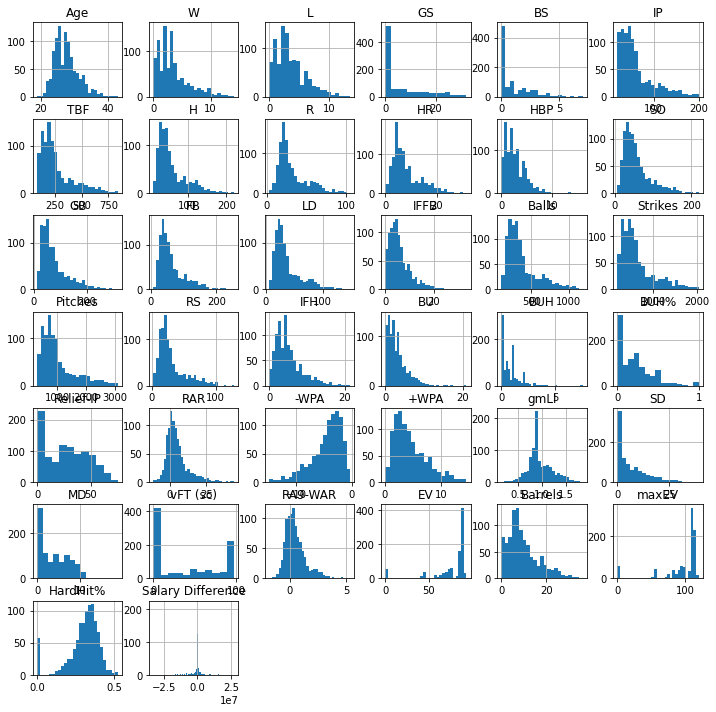

In [15]:
# check distribution of features
X_train.hist(figsize = [12,12], bins = 'auto')
plt.show()

## Preprocessing Pipeline

In [16]:
# define numeric columns to be standard scaled
num_cols = X_train.select_dtypes(['int', 'float']).columns

In [17]:
# define numeric transformation pipeline that scales the numbers
numeric_pipeline = Pipeline([('numnorm', StandardScaler()), # apply a standard scaler
                             ])

In [18]:
# transform the selected columns with numeric pipelines
pitch_adv_ct = ColumnTransformer(transformers = [("numpipe", numeric_pipeline, num_cols)])

### Pickle the Transformers

In [19]:
# save the transformer
dump(pitch_adv_ct, open('pkl/pitch_adv_ct.pkl', 'wb'))

In [20]:
# load the transformer
pitch_adv_ct  = load(open('pkl/pitch_adv_ct.pkl', 'rb'))

**Transform `pitching_adv_grouped`**

In [23]:
# inspect the preprocessed batting basic X train aka pp_bb_X_train
pp_X_train = pd.DataFrame(pitch_adv_ct.fit_transform(X_train))
pp_X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,-0.265749,-0.045478,-0.595435,-0.746443,0.787817,-0.608860,-0.641027,-0.777976,-0.746908,-0.555262,-0.598452,-0.372904,-0.833403,-0.492450,-0.618932,-0.302791,-0.554447,-0.570599,-0.566922,-0.428670,-1.080989,-0.841192,-0.935762,-0.988770,0.556815,-0.267868,0.608127,-0.385989,0.553578,0.845233,0.358060,-0.988850,-0.110493,-0.440048,-0.881233,-0.482678,-0.307497,0.249125
1,-0.056292,-0.327350,-0.793053,-0.746443,0.983053,-0.776364,-0.822857,-0.852075,-0.921964,-0.880426,0.020009,-0.624345,-0.679722,-0.984564,-0.827964,-0.901110,-0.870832,-0.848865,-0.859841,-0.359382,-0.668647,-0.841192,-0.935762,-0.988770,0.243108,-0.397189,0.688520,-0.779940,-0.024289,0.127091,0.430294,-0.380993,-0.083491,0.570477,-0.700806,0.454111,0.517812,0.135127
2,-0.335568,-0.515264,-0.463689,-0.372494,-0.774079,-0.226538,-0.255910,-0.241317,-0.253161,0.033129,-0.598452,-0.365720,-0.069804,-0.237049,-0.228740,-0.320922,-0.309287,-0.294945,-0.301157,-0.293942,-0.095949,-0.745187,-0.534659,-0.209027,0.501801,-0.340072,0.712936,-0.618907,-1.033107,-0.192083,-0.388355,0.197253,-0.110493,0.524410,-0.063296,0.541871,0.598487,0.150399
3,-0.894120,-0.891093,-0.002579,0.080181,-0.774079,-0.419829,-0.277365,-0.151499,0.114905,0.002161,-0.845836,-0.408824,-0.405980,-0.087546,-0.284482,0.295528,0.020478,-0.268817,-0.166375,-0.486411,-0.325028,0.022859,0.267547,0.180844,-0.603523,-0.613802,0.418756,-0.717960,-1.346526,-0.898826,-0.725445,-0.988850,-1.136557,0.545048,0.129159,0.563447,0.454885,0.160144
4,-1.033758,-1.016369,-1.122417,-0.746443,0.267185,-0.970552,-0.971433,-0.928420,-0.827703,-0.617198,-0.351067,-0.887760,-1.014297,-0.714628,-1.002157,-0.393445,-1.045947,-0.945976,-0.985196,-0.701976,-0.508291,-0.489171,-0.534659,-0.469462,-0.120574,-0.721569,1.125026,-1.207002,-1.020048,-0.579652,0.093203,1.380818,-0.722531,0.512617,-0.616607,0.478311,-0.246991,0.104632


In [24]:
pp_X_train.shape

(966, 38)

Now lets do the same transformation for the `X_test`

In [27]:
# inspect the preprocessed batting basic X train aka pp_bb_X_test
pp_X_test = pd.DataFrame(pitch_adv_ct.transform(X_test))
pp_X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,-0.195930,1.149120,1.324288,1.547860,-0.774079,1.151616,1.186015,1.266975,1.165239,1.541712,0.921196,1.241454,1.246083,0.903801,1.014501,0.559721,1.218900,1.324077,1.291343,1.295299,1.206530,1.613812,1.470857,0.428802,-1.343965,0.762545,-1.169205,1.058213,-0.350301,-0.898826,-1.076295,-0.988850,0.707273,0.551366,1.624128,0.548952,0.714199,0.317685
1,-0.195930,-0.891093,-0.595435,-0.746443,-0.774079,-1.022575,-0.949978,-0.623041,-0.396797,-0.183647,-0.845836,-0.753658,-0.924650,-0.847520,-0.890674,-0.901110,-0.949929,-0.933782,-0.942989,-0.855951,-1.424608,-0.745187,-0.935762,-0.988770,-0.218004,-0.962969,0.647430,-1.166249,-0.523801,-0.488459,1.152631,-0.988850,-1.622588,0.660031,-0.231695,0.426996,1.485916,0.032616
2,0.222984,0.612222,0.787895,0.552537,-0.383605,1.100490,1.219117,1.424797,1.380693,1.117008,1.133239,0.410157,1.322923,0.996351,1.722222,0.621884,1.260050,1.054582,1.131920,0.760786,0.774552,2.134986,0.869202,-0.403963,0.762173,-0.646132,-1.014033,0.761052,-0.190793,0.127091,0.719229,1.347400,-0.002486,-1.433989,-0.953404,-1.455329,-1.466802,0.072514
3,-0.475206,-0.139436,-0.595435,-0.628354,0.787817,-0.002750,-0.100362,-0.380534,-0.504523,-0.555262,1.628008,0.424525,-0.079409,-0.548514,-0.138160,-0.248398,-0.114104,-0.055871,-0.076896,-0.532604,1.324342,-0.745187,0.267547,3.689687,1.641561,0.614749,-0.220818,0.582755,1.395892,1.836952,1.730501,-0.988850,0.753562,0.522936,-0.087353,0.510966,0.314510,-0.583603
4,-2.150862,-0.891093,-0.990672,-0.746443,0.006869,-1.027956,-1.065834,-1.161945,-1.150883,-1.112686,-1.340605,-0.753658,-1.078330,-1.071774,-1.016093,-0.901110,-1.058539,-0.988652,-1.017274,-0.809758,-0.325028,-0.745187,0.267547,3.689687,-0.228083,-0.148246,0.926127,-0.758714,0.769053,0.058696,-0.003108,1.579629,-0.326506,0.514091,-0.809062,0.479477,0.304829,0.299805


In [28]:
pp_X_test.shape

(323, 38)

**Log Transforming Salary**

In [29]:
# basic y
log_y_train = np.log(y_train)
log_y_test = np.log(y_test)

## Modeling

In [30]:
# import my helper function to get model results
from functions import *

### Linear Regression

In [31]:
# build pipeline 
steps = [('preprocess', pitch_adv_ct), 
         ('model', LinearRegression())]

lin_reg_pipeline = Pipeline(steps)

lin_reg_pipeline.fit(X_train, log_y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numpipe',
                                                  Pipeline(steps=[('numnorm',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'W', 'L', 'GS', 'BS', 'IP', 'TBF', 'H', 'R', 'HR', 'HBP', 'SO',
       'GB', 'FB', 'LD', 'IFFB', 'Balls', 'Strikes', 'Pitches', 'RS', 'IFH',
       'BU', 'BUH', 'BUH%', 'Relief-IP', 'RAR', '-WPA', '+WPA', 'gmLI', 'SD',
       'MD', 'vFT (sc)', 'RA9-WAR', 'EV', 'Barrels', 'maxEV', 'HardHit%',
       'Salary Difference'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [32]:
# instantiate the model
lr_model = Pipeline(steps).steps[1][1]  # gets the class name of the model

# get model results
model_results(lr_model, pp_X_train, log_y_train, pp_X_test, log_y_test)

             LinearRegression() RESULTS
LinearRegression() Training R2:               0.6049
LinearRegression() Test R2:                   0.5497
-------------------------------------------------------
LinearRegression() Cross Validation R2:       0.5553
LinearRegression() Cross Validation RMSE:    2655939
-------------------------------------------------------
LinearRegression() Training RMSE:            3328563
LinearRegression() Test RMSE:                2632774


## PCA

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components= 20) # Check out how `n_components` works

X_train_pca = pca.fit_transform(pp_X_train)
X_test_pca = pca.transform(pp_X_test)

In [35]:
lr_pca = LinearRegression()

# get model results
model_results(lr_pca, X_train_pca, log_y_train, X_test_pca, log_y_test)

             LinearRegression() RESULTS
LinearRegression() Training R2:               0.5829
LinearRegression() Test R2:                   0.569
-------------------------------------------------------
LinearRegression() Cross Validation R2:       0.5541
LinearRegression() Cross Validation RMSE:    2750242
-------------------------------------------------------
LinearRegression() Training RMSE:            3394118
LinearRegression() Test RMSE:                2828545


In [36]:
lr_pca.coef_

array([ 0.12837659,  0.20344995,  0.06930073, -0.06227109, -0.01150246,
       -0.27281505, -0.03891546, -0.12963479,  0.15180488, -0.11669889,
       -0.18769734, -0.11463097, -0.04717594,  0.02105402,  0.01838916,
        0.11542292,  0.08214664, -0.04839995, -0.12745626, -0.16166756])

### Support Vector Machine

In [37]:
from sklearn import svm
from sklearn.svm import LinearSVR

In [38]:
# build pipeline 
svm_steps = [('preprocess', pitch_adv_ct),
            ('model', svm.SVR())]

svm_pipeline = Pipeline(svm_steps)

# define parameters in the grid
svm_grid = {
            'model__kernel': ['rbf'],
            'model__C': [0.1, 1],
            'model__degree': [2,3]
           }  

# get best R2 score from grid search
svm_model = GridSearchCV(estimator = svm_pipeline,
                         param_grid = svm_grid,
                         scoring = 'r2')


# fit and give me the best params
svm_model.fit(X_train, log_y_train)
display(svm_model.best_params_)
print("Best CV Score:", round(svm_model.best_score_,5))

{'model__C': 1, 'model__degree': 2, 'model__kernel': 'rbf'}

Best CV Score: 0.6532


In [39]:
# instantiate the model
best_model = svm_model.best_estimator_
svm_model = best_model.steps[1][1]  # gets the class name of the model

# get model results
model_results(svm_model, pp_X_train, log_y_train, pp_X_test, log_y_test)

             SVR(C=1, degree=2) RESULTS
SVR(C=1, degree=2) Training R2:               0.767
SVR(C=1, degree=2) Test R2:                   0.6708
-------------------------------------------------------
SVR(C=1, degree=2) Cross Validation R2:       0.6537
SVR(C=1, degree=2) Cross Validation RMSE:    4246599
-------------------------------------------------------
SVR(C=1, degree=2) Training RMSE:            1817458
SVR(C=1, degree=2) Test RMSE:                2791844


### Gradient Boosting Regressor

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
# build pipeline 
ensemble_steps = [('preprocess', pitch_adv_ct), 
                  ('model', GradientBoostingRegressor(random_state = 42))]

ensemble_pipeline = Pipeline(ensemble_steps)

# define parameters in the grid
ensemble_grid = {
                'model__learning_rate': [0.1], 
                'model__n_estimators': [30],
                'model__max_depth': [3],
                'model__max_features': [20, 25]
               }  

# get best R2 score from grid search
ensemble_model = GridSearchCV(estimator = ensemble_pipeline,
                         param_grid = ensemble_grid,
                         scoring = 'r2')

# fit and give me the best params
ensemble_model.fit(X_train, log_y_train)
display(ensemble_model.best_params_)
print("Best CV Score:", round(ensemble_model.best_score_,5))

{'model__learning_rate': 0.1,
 'model__max_depth': 3,
 'model__max_features': 25,
 'model__n_estimators': 30}

Best CV Score: 0.7482


In [42]:
# instantiate the model
best_model = ensemble_model.best_estimator_
ensemble_model = best_model.steps[1][1]   # gets the class name of the model

# get model results
model_results(ensemble_model, pp_X_train, log_y_train, pp_X_test, log_y_test)

             GradientBoostingRegressor(max_features=25, n_estimators=30, random_state=42) RESULTS
GradientBoostingRegressor(max_features=25, n_estimators=30, random_state=42) Training R2:               0.8237
GradientBoostingRegressor(max_features=25, n_estimators=30, random_state=42) Test R2:                   0.764
-------------------------------------------------------
GradientBoostingRegressor(max_features=25, n_estimators=30, random_state=42) Cross Validation R2:       0.748
GradientBoostingRegressor(max_features=25, n_estimators=30, random_state=42) Cross Validation RMSE:    2108785
-------------------------------------------------------
GradientBoostingRegressor(max_features=25, n_estimators=30, random_state=42) Training RMSE:            1798802
GradientBoostingRegressor(max_features=25, n_estimators=30, random_state=42) Test RMSE:                2441569


### Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
# build pipeline 
rfr_steps = [('preprocess', pitch_adv_ct), 
            ('model', RandomForestRegressor(random_state = 42))]

rfr_pipeline = Pipeline(rfr_steps)

# define parameters in the grid
rfr_grid = {'model__n_estimators': [120],
            'model__max_depth': [3, 4],
#             'model__min_samples_split': [2],
#             'model__min_samples_leaf': [2],
            'model__max_features': [10]}  

# get best R2 score from grid search
rfr_model = GridSearchCV(estimator = rfr_pipeline,
                           param_grid = rfr_grid,
                           scoring = 'r2')

# fit and give me the best params
rfr_model.fit(X_train, log_y_train)
rfr_model.best_params_
display(rfr_model.best_params_)
print("Best CV Score:", round(rfr_model.best_score_,5))

{'model__max_depth': 4, 'model__max_features': 10, 'model__n_estimators': 120}

Best CV Score: 0.71516


In [45]:
# instantiate the model
best_model = rfr_model.best_estimator_
rfr_model = best_model.steps[1][1]   # gets the class name of the model

# get model results
model_results(rfr_model, pp_X_train, log_y_train, pp_X_test, log_y_test)

             RandomForestRegressor(max_depth=4, max_features=10, n_estimators=120,
                      random_state=42) RESULTS
RandomForestRegressor(max_depth=4, max_features=10, n_estimators=120,
                      random_state=42) Training R2:               0.7712
RandomForestRegressor(max_depth=4, max_features=10, n_estimators=120,
                      random_state=42) Test R2:                   0.7239
-------------------------------------------------------
RandomForestRegressor(max_depth=4, max_features=10, n_estimators=120,
                      random_state=42) Cross Validation R2:       0.7152
RandomForestRegressor(max_depth=4, max_features=10, n_estimators=120,
                      random_state=42) Cross Validation RMSE:    2204442
-------------------------------------------------------
RandomForestRegressor(max_depth=4, max_features=10, n_estimators=120,
                      random_state=42) Training RMSE:            2123477
RandomForestRegressor(max_depth=4, max_feat

### CatBoost

In [46]:
from catboost import CatBoostRegressor

In [47]:
# build pipeline 
cbr_steps = [('preprocess', pitch_adv_ct), 
            ('model', CatBoostRegressor(random_state = 42, 
                                        allow_writing_files=False,
                                        verbose = False))]

cbr_pipeline = Pipeline(cbr_steps)

# define parameters in the grid
cbr_grid = {
                'model__learning_rate': [0.1],
                'model__iterations': [250],
                'model__max_depth': [4],
#                 'model__l2_leaf_reg': [0.1, 1, 10]
               }  

# get best R2 score from grid search
cbr_model = GridSearchCV(estimator = cbr_pipeline,
                         param_grid = cbr_grid,
                         scoring = 'r2')

# fit and give me the best params
cbr_model.fit(X_train, log_y_train)
cbr_model.best_params_
display(cbr_model.best_params_)
print("Best CV Score:", round(cbr_model.best_score_,5))

{'model__iterations': 250, 'model__learning_rate': 0.1, 'model__max_depth': 4}

Best CV Score: 0.75501


In [48]:
# instantiate the model
best_model = cbr_model.best_estimator_
cbr_model = best_model.steps[1][1]   # gets the class name of the model

# get model results
model_results(cbr_model, pp_X_train, log_y_train, pp_X_test, log_y_test)

             <catboost.core.CatBoostRegressor object at 0x15d073d90> RESULTS
<catboost.core.CatBoostRegressor object at 0x15d073d90> Training R2:               0.908
<catboost.core.CatBoostRegressor object at 0x15d073d90> Test R2:                   0.7788
-------------------------------------------------------
<catboost.core.CatBoostRegressor object at 0x15d073d90> Cross Validation R2:       0.7548
<catboost.core.CatBoostRegressor object at 0x15d073d90> Cross Validation RMSE:    1936894
-------------------------------------------------------
<catboost.core.CatBoostRegressor object at 0x15d073d90> Training RMSE:            1120842
<catboost.core.CatBoostRegressor object at 0x15d073d90> Test RMSE:                2061249


### XGBoost

In [49]:
import xgboost as xgb
from xgboost import XGBRegressor

In [50]:
# build pipeline 
xgb_steps = [('preprocess', pitch_adv_ct), 
            ('model', XGBRegressor())]

xgb_pipeline = Pipeline(xgb_steps)

# define parameters in the grid
xgb_grid = {'model__n_estimators': [100, 120, 130],
            'model__max_depth': [4, 5,6],
            'model__learning_rate': [0.1]}  

# get best R2 score from grid search
xgb_model = GridSearchCV(estimator = xgb_pipeline,
                           param_grid = xgb_grid,
                           scoring = 'r2')

# fit and give me the best params
xgb_model.fit(X_train, log_y_train)
display(xgb_model.best_params_)
print("Best CV Score:", round(xgb_model.best_score_,5))

{'model__learning_rate': 0.1,
 'model__max_depth': 4,
 'model__n_estimators': 100}

Best CV Score: 0.75754


In [51]:
# instantiate the model
best_model = xgb_model.best_estimator_
xgb_model = best_model.steps[1][1]   # gets the class name of the model

# get model results
model_results(xgb_model, pp_X_train, log_y_train, pp_X_test, log_y_test)

             XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) RESULTS
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             impor

# Visualize the Model Fit on Test Set

### Predicted Plots & Residuals

In [52]:
# get residuals
y_pred_test = ensemble_model.predict(pp_X_test)
resid = y_test - np.exp(y_pred_test)

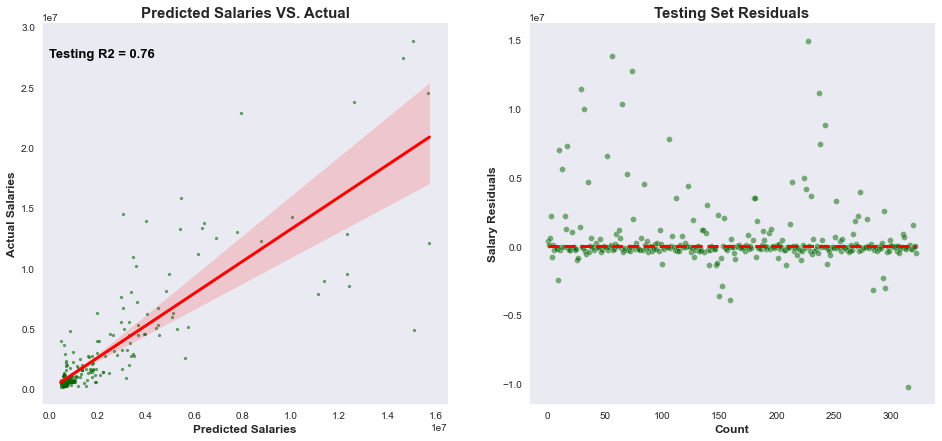

In [66]:
sns.set_style("dark")

# plots TESTING set & residuals
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# plots regplots
sns.regplot(ax = axes[0], 
            x = np.exp(y_pred_test), 
            y = y_test,
            scatter_kws={'s':5, 'alpha': 0.5, 'color': 'darkgreen'},
            line_kws={"color": "red"})

# annotate regplot
axes[0].text(50, 2.75e7, "Testing R2 = 0.76", 
             horizontalalignment='left', fontsize=13, color='black', weight = 'bold')

# regplot labels
axes[0].set_xlabel('Predicted Salaries', weight = 'bold') 
axes[0].set_ylabel('Actual Salaries', weight = 'bold') 
axes[0].set_title('Predicted Salaries VS. Actual', weight = 'bold', fontdict = {'fontsize' : 15})

# plots residual
sns.scatterplot(ax = axes[1], 
                x = range(y_test.shape[0]),
                y = resid, 
                alpha=0.5,
                color= "darkgreen")
# plot zero line in residual
sns.lineplot(ax = axes[1], 
             x=range(y_test.shape[0]), y = 0, 
             color='red', linestyle="dashed", linewidth = 3)

# residual labels
axes[1].set_xlabel('Count', weight = 'bold') 
axes[1].set_ylabel('Salary Residuals', weight = 'bold') 
axes[1].set_title('Testing Set Residuals', weight = 'bold', fontdict = {'fontsize' : 15})

# removes top and right side axis
sns.despine(right = True)

# set gridline visibility
axes[0].set_axisbelow(True)
axes[0].yaxis.grid(True, color='#EEEEEE')
axes[0].xaxis.grid(False)
axes[1].set_axisbelow(True)
axes[1].yaxis.grid(True, color='#EEEEEE')
axes[1].xaxis.grid(False)

plt.show()
fig.savefig('plots/pitching_adv_resids.png');


### Assessing the Important Features

Lets now assess which features in the Gradient Boost model are the most important when making a prediction. 

In [54]:
top_features

Index(['Age', 'W', 'L', 'GS', 'BS', 'IP', 'TBF', 'H', 'R', 'HR', 'HBP', 'SO',
       'GB', 'FB', 'LD', 'IFFB', 'Balls', 'Strikes', 'Pitches', 'RS', 'IFH',
       'BU', 'BUH', 'BUH%', 'Relief-IP', 'RAR', '-WPA', '+WPA', 'gmLI', 'SD',
       'MD', 'vFT (sc)', 'RA9-WAR', 'EV', 'Barrels', 'maxEV', 'HardHit%',
       'Salary Difference'],
      dtype='object')

In [55]:
# get feature weights
best_model_coef = ensemble_model.feature_importances_
best_model_coef

array([1.02623417e-01, 2.03775091e-03, 5.44552020e-04, 0.00000000e+00,
       0.00000000e+00, 2.78296554e-03, 6.20590786e-04, 7.36373094e-03,
       1.34222395e-03, 1.25627777e-03, 0.00000000e+00, 5.01044718e-05,
       1.64972533e-02, 3.65890746e-03, 9.19137649e-04, 6.97717214e-05,
       6.65692362e-03, 8.76968011e-04, 2.01080740e-03, 2.59931915e-03,
       0.00000000e+00, 6.90935506e-04, 0.00000000e+00, 2.51172863e-03,
       4.07546155e-03, 1.78224681e-02, 4.16591680e-02, 5.51648788e-02,
       7.21239012e-03, 5.39879418e-03, 4.77833926e-03, 1.20953255e-03,
       5.73355154e-04, 7.81678054e-02, 1.87340153e-03, 8.98481129e-02,
       2.92104836e-03, 5.34181878e-01])

In [56]:
# check feature importances 
feat_imp_series = pd.Series(best_model_coef, 
                            index = pp_X_train.columns)

# preview first 5
feat_imp_series[:5]

0    0.102623
1    0.002038
2    0.000545
3    0.000000
4    0.000000
dtype: float64

We need to index these importance features values with their appropriate values to make sense of which Importance value is associated with which Feature. We'll merge the `top_features_df` with the `feat_imp_df`. 

In [57]:
top_features_list = list(top_features)
top_features_df = pd.DataFrame(top_features_list)
top_features_df.head()

,0
0,Age
1,W
2,L
3,GS
4,BS


In [58]:
# convert feat_imp_series into a df
feat_imp_df = pd.DataFrame(feat_imp_series)
feat_imp_df.head()

,0
0,0.102623
1,0.002038
2,0.000545
3,0.000000
4,0.000000


In [59]:
# merge the feature names and feature importance dataframes based on index
merged = pd.merge(top_features_df, feat_imp_df, left_index=True, right_index=True)

# rename the new merged dataframe
merged = merged.rename(columns = {'0_x': 'Feature', '0_y': 'Importance'})
merged.head()

,Feature,Importance
0,Age,0.102623
1,W,0.002038
2,L,0.000545
3,GS,0.000000
4,BS,0.000000


In [63]:
# sort by top 15 most important features
sorted_features = merged.sort_values('Importance', ascending = False)

# create a top 15 features df
top_15_features = sorted_features.head(15)
top_15_features

,Feature,Importance
37,Salary Difference,0.534182
0,Age,0.102623
35,maxEV,0.089848
33,EV,0.078168
27,+WPA,0.055165
26,-WPA,0.041659
25,RAR,0.017822
12,GB,0.016497
7,H,0.007364
28,gmLI,0.007212


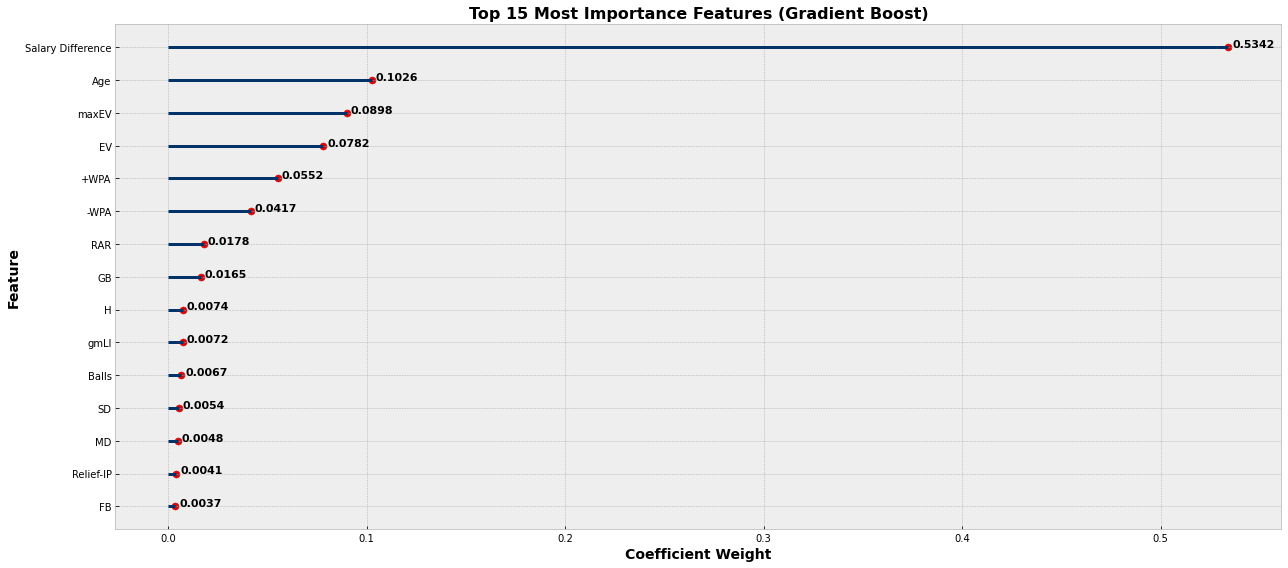

In [64]:
# plot a lollipop plot of top 15 most important features
fig, ax = plt.subplots(figsize=(18, 8))
plt.style.use('bmh')

# sort by descending
top_15_features= top_15_features.sort_values(by = 'Importance')

# plots the lines
plt.hlines(y = top_15_features['Feature'],  # feature
           xmin = 0,
           xmax = top_15_features['Importance'],  # importance
           color = '#013369', linewidth = 3)

plt.scatter(top_15_features['Importance'], # Count values
            top_15_features['Feature'],  # positions
            color='#d50a0a', 
            alpha=1, s = 50)

# annotate the scatter plot values
for idx, row in top_15_features.iterrows():
    ax.annotate(round(row['Importance'],4), (row['Importance'], row['Feature'] ), 
                weight = "bold", fontsize = 11, 
                xytext=(row['Importance'] + 0.002, row['Feature'])) # offset annotate

plt.title('Top 15 Most Importance Features (Gradient Boost)', weight = "bold", fontsize = 16)
plt.ylabel('Feature', weight = "bold", fontsize = 14)
plt.xlabel('Coefficient Weight', weight = "bold", fontsize = 14)

plt.tight_layout()
plt.show()
# fig.savefig('images/top_team_important_features.png');